In [604]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [605]:
data=pd.read_csv(r"C:\CODING\SHIASH\projects\co2 emission\CO2 Emissions.csv")

In [606]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [607]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [608]:
le=LabelEncoder()
for i in data:
    if data[i].dtypes=="object":
        data[i]=le.fit_transform(data[i])

In [609]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int32  
 1   Model                             7385 non-null   int32  
 2   Vehicle Class                     7385 non-null   int32  
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   int32  
 6   Fuel Type                         7385 non-null   int32  
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [610]:
data.isna().sum().sum()

0

In [611]:
data.duplicated().sum()

1103

In [612]:
len(data)

7385

In [613]:
data.drop_duplicates(keep="first",inplace=True)

In [614]:
len(data)

6282

In [615]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Make'),
  Text(1, 0, 'Model'),
  Text(2, 0, 'Vehicle Class'),
  Text(3, 0, 'Engine Size(L)'),
  Text(4, 0, 'Cylinders'),
  Text(5, 0, 'Transmission'),
  Text(6, 0, 'Fuel Type'),
  Text(7, 0, 'Fuel Consumption City (L/100 km)'),
  Text(8, 0, 'Fuel Consumption Hwy (L/100 km)'),
  Text(9, 0, 'Fuel Consumption Comb (L/100 km)'),
  Text(10, 0, 'Fuel Consumption Comb (mpg)'),
  Text(11, 0, 'CO2 Emissions(g/km)')])

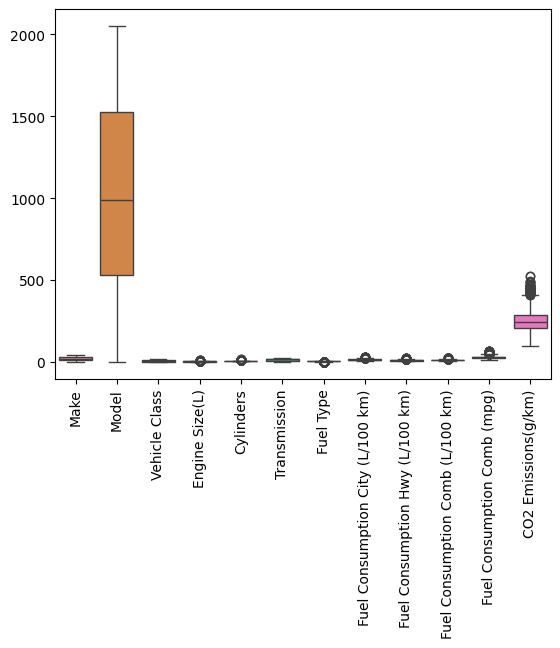

In [616]:

sns.boxplot(data)
plt.xticks(rotation="vertical")


In [617]:
out_list=["Cylinders",'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
for i in out_list:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1

    data=data[(data[i]>q1-1.5*iqr)&(data[i]<q3+1.5*iqr)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Make'),
  Text(1, 0, 'Model'),
  Text(2, 0, 'Vehicle Class'),
  Text(3, 0, 'Engine Size(L)'),
  Text(4, 0, 'Cylinders'),
  Text(5, 0, 'Transmission'),
  Text(6, 0, 'Fuel Type'),
  Text(7, 0, 'Fuel Consumption City (L/100 km)'),
  Text(8, 0, 'Fuel Consumption Hwy (L/100 km)'),
  Text(9, 0, 'Fuel Consumption Comb (L/100 km)'),
  Text(10, 0, 'Fuel Consumption Comb (mpg)'),
  Text(11, 0, 'CO2 Emissions(g/km)')])

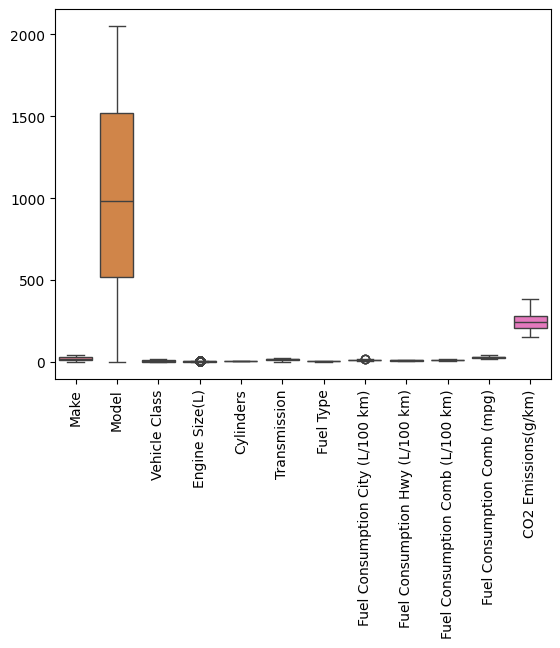

In [618]:
sns.boxplot(data)
plt.xticks(rotation="vertical")

<Axes: >

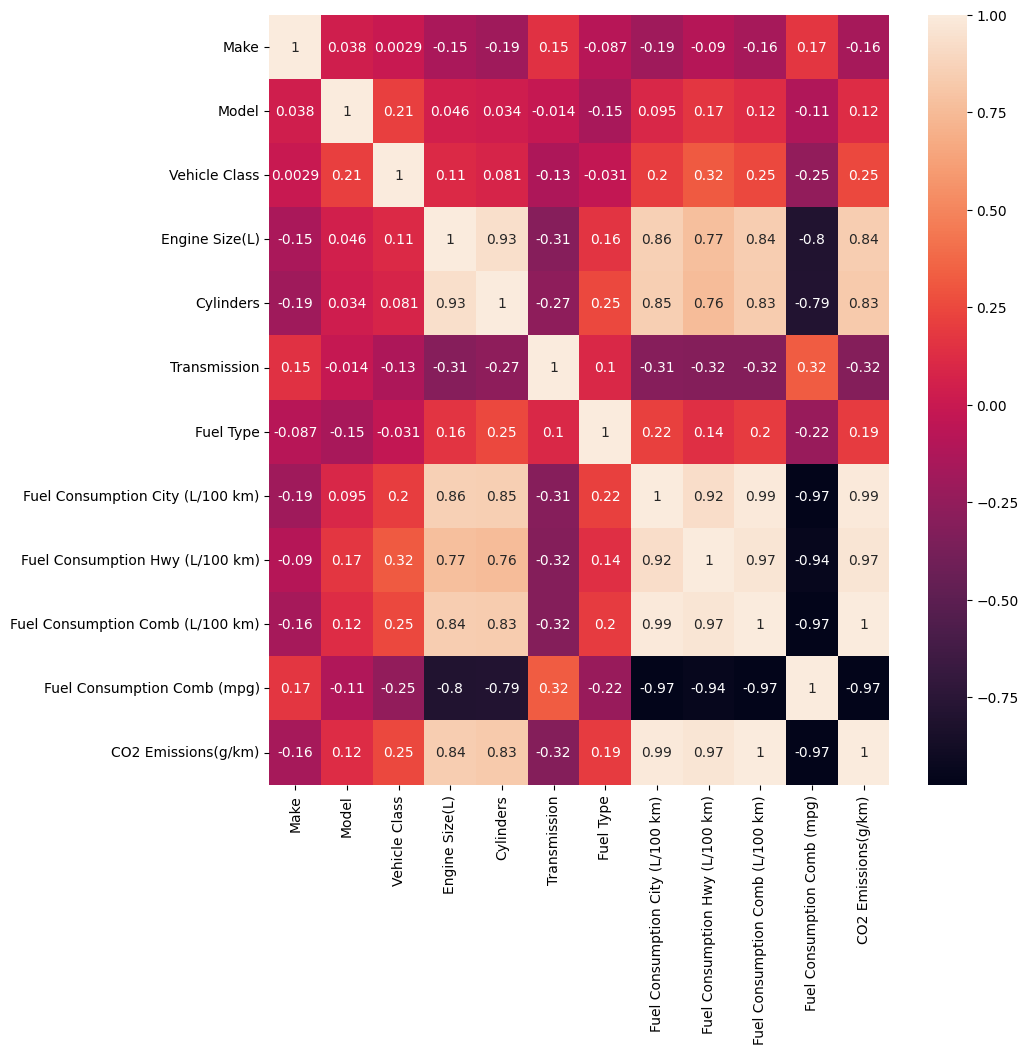

In [619]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [620]:
# from sklearn.preprocessing import MinMaxScaler
# scale=MinMaxScaler()
# a=scale.fit_transform(data)
# data=pd.DataFrame(a,columns=data.columns)
# data

In [621]:
x=data.drop(["CO2 Emissions(g/km)"],axis=1)
y=data["CO2 Emissions(g/km)"]

In [622]:
x

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27
5,0,1510,2,3.5,6,15,4,11.9,7.7,10.0,28
...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29


In [623]:
y

0       196
1       221
3       255
4       244
5       230
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 5392, dtype: int64

In [624]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [625]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4044, 11)
(4044,)
(1348, 11)
(1348,)


In [626]:
co2_model=LinearRegression()
co2_model.fit(x_train,y_train)

LinearRegression()

In [627]:
pred=co2_model.predict(x_test)

In [628]:
acc=r2_score(y_test,pred)
acc*100

99.53266026051848

In [629]:
de_co2_model=DecisionTreeClassifier()
de_co2_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [630]:
pred1=de_co2_model.predict(x_test)

In [631]:
acc1=r2_score(y_test,pred1)
acc1*100

99.40050153771763

In [632]:
y_pred_train = co2_model.predict(x_train)
training_accuracy = r2_score(y_train, y_pred_train)
print("Training Accuracy Linear:", training_accuracy*100)

Training Accuracy Linear: 99.73728373707344


In [633]:
y_pred_train = de_co2_model.predict(x_train)
training_accuracy = r2_score(y_train, y_pred_train)
print("Training Accuracy Decision:", training_accuracy*100)


Training Accuracy Decision: 99.9323955623181


Linear Pediction

In [643]:
co2_model.predict([[12	,128,	3	,1.4,	4	,24,	3,	8.5,	6.9	,7.8,	36]])

C:\Users\sundh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([182.00643534])

Decision Prediction

In [642]:
de_co2_model.predict([[12	,128,	3	,1.4,	4	,24,	3,	8.5,	6.9	,7.8,	36]])

C:\Users\sundh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([179], dtype=int64)

In [636]:
x_train

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
6904,16,375,1,1.5,4,19,3,7.9,6.3,7.2,39
1928,30,1130,0,2.4,4,21,3,10.5,8.2,9.5,30
6642,7,822,12,3.6,6,6,3,13.6,9.6,11.8,24
336,12,128,3,1.4,4,24,3,8.5,6.9,7.8,36
5851,15,1716,6,5.3,8,5,3,14.3,10.4,12.5,23
...,...,...,...,...,...,...,...,...,...,...,...
6512,0,1784,0,3.5,6,18,4,12.0,8.2,10.3,27
4119,29,543,2,2.0,4,17,4,10.0,7.2,8.7,32
2203,0,1057,0,2.4,4,10,4,9.3,6.6,8.1,35
3302,41,1861,9,3.0,6,15,3,13.0,9.0,11.2,25


In [637]:
y_train

6904    170
1928    219
6642    277
336     179
5851    294
       ... 
6512    240
4119    205
2203    189
3302    259
3452    194
Name: CO2 Emissions(g/km), Length: 4044, dtype: int64

LASSO RIDGE

In [638]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(x_train, y_train)

Lasso(random_state=42)

In [639]:
lasso_train_pred = lasso_model.predict(x_train)
lasso_test_pred = lasso_model.predict(x_test)

In [640]:

lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_train_mse1 = r2_score(y_train, lasso_train_pred)
lasso_test_mse1 = r2_score(y_test, lasso_test_pred)

print(f'Lasso Train MSE: {lasso_train_mse:.4f}')
print(f'Lasso Test MSE: {lasso_test_mse:.4f}')
print(f'Lasso Train r2: {lasso_train_mse1:.4f}')
print(f'Lasso Test r2: {lasso_test_mse1:.4f}')





Lasso Train MSE: 8.6244
Lasso Test MSE: 13.8133
Lasso Train r2: 0.9964
Lasso Test r2: 0.9944


In [641]:

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(x_train, y_train)

ridge_train_pred = ridge_model.predict(x_train)
ridge_test_pred = ridge_model.predict(x_test)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_train_mse1 = r2_score(y_train, ridge_train_pred)
ridge_test_mse1 = r2_score(y_test, ridge_test_pred)

print(f'Ridge Train MSE: {ridge_train_mse:.4f}')
print(f'Ridge Test MSE: {ridge_test_mse:.4f}')
print(f'Ridge Train r2: {ridge_train_mse1:.4f}')
print(f'Ridge Test r2: {ridge_test_mse1:.4f}')




Ridge Train MSE: 6.2630
Ridge Test MSE: 11.4301
Ridge Train r2: 0.9974
Ridge Test r2: 0.9953
